In [1]:
import pandas as pd

# Read data into a dataframe
df = pd.read_csv(r"C:\Users\parth\OneDrive\Documents\Star-Class-Forest\data\star_data.csv")

# Data information such as columns, non-null count, and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [2]:
# First 5 rows of data
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [3]:
for x in df.columns:
    print(x,':',df[x].dtype)

Temperature (K) : int64
Luminosity(L/Lo) : float64
Radius(R/Ro) : float64
Absolute magnitude(Mv) : float64
Star type : int64
Star color : object
Spectral Class : object


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def variable_plot_scatter(data:pd.DataFrame, variable1:str, variable2:str, color:str, title:str, invert_x=False, invert_y=False, scale_x=None, scale_y=None) -> None:
    """
    Plots a scatter plot for the given variables from the data.
    
    Parameters:
    ----------
    - data : pd.DataFrame
        - The dataset containing the variables and data.
    - variable1 : str
        - The variable for the x-axis.
    - variable2 : str
        - The variable for the y-axis.
    - color: str
        - The color of the data points.
    - title : str
        - The title of the plot.
    - invert_x : bool 
        - If True, inverts the x-axis. Default is False.
    - invert_y : bool
        - If True, inverts the y-axis. Default is False.
    - scale_x : str
        - Scale for the x-axis (e.g., 'log', 'logit'). Default is None.
    - scale_y : str
        - Scale for the y-axis (e.g., 'symlog', 'linear'). Default is None.

    Returns:
    ----------
    None
    """

    x = data[variable1]
    y = data[variable2]

    plt.figure(figsize=(10,8))
    plt.scatter(x, y, c=color, alpha=0.6)

    if invert_x:
        plt.gca().invert_xaxis()
    if invert_y:
        plt.gca().invert_yaxis()

    if scale_x:
        plt.xscale(scale_x)
    if scale_y:
        plt.yscale(scale_y)
    
    plt.xlabel(variable1)
    plt.ylabel(variable2)
    plt.title(title)
    plt.show()

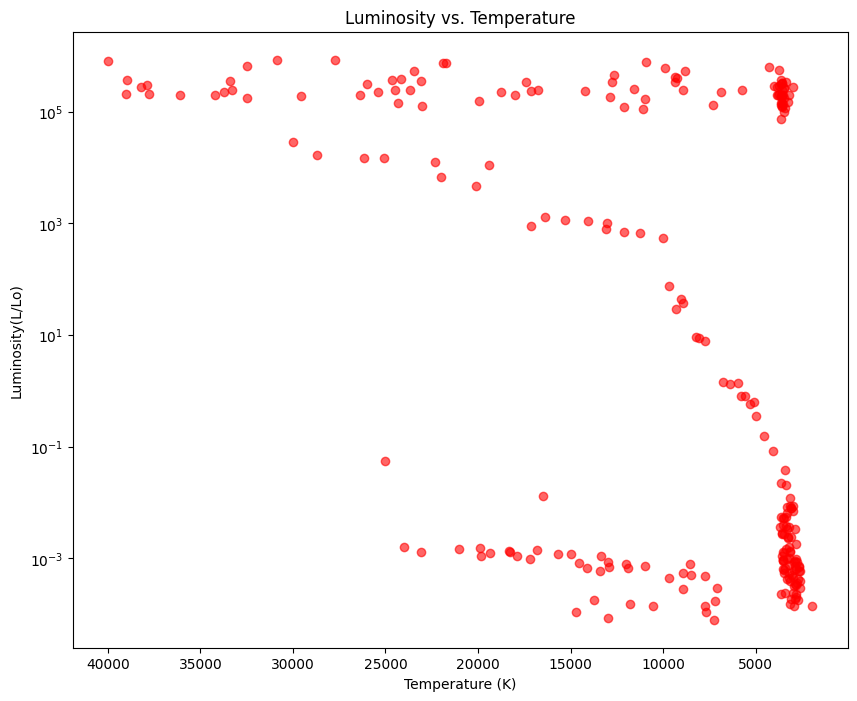

In [5]:
variable_plot_scatter(df, 'Temperature (K)', 'Luminosity(L/Lo)', 'red', 'Luminosity vs. Temperature', invert_x=True, scale_y='log')

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

labels = df['Spectral Class']
features = df.drop(['Star color','Spectral Class'], axis=1)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

scaler = StandardScaler()
X = scaler.fit_transform(features)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_real = train_test_split(X,y, test_size=0.25, random_state=42, shuffle=True)

In [8]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score

accuracy = accuracy_score(y_real, y_pred)
f1 = f1_score(y_real, y_pred, average="macro")
precision = precision_score(y_real, y_pred, average='macro')

accuracy, precision, f1

c:\Users\parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.8666666666666667, 0.5011883541295306, 0.5181818181818182)